In [1]:
import pandas as pd
import numpy as np 
import geopandas

My dataset is Supermarket availbilty within each neighborhood. This is measured by the number of supermarkets per neighborhood. This is important as supermarkets provide access to nutiritous food, which is necessary to live in a neighborhood.

In [2]:
supermarket = pd.read_csv("https://data.wprdc.org/datastore/dump/626357fa-c95d-465f-9a02-3121655b2b78", 
                          index_col = "Client ID",
                          parse_dates = True) 
supermarket.sample()

,Name,Legal Name,Start Date,Street #,Street Name,State,Zip,Lat,Lon,Accuracy,Category
Client ID,,,,,,,,,,,
200601310002,Sam's Club #6575,Sam's East Inc,10/7/1996,249,Summit Park Dr,PA,15275.0,40.449585,-80.177954,9.0,Supermarket


I used a query mask to separate "supermarkets" from "convenience stores" as conveince stores typically provide snacks and limited actual food products with low access to necessities for cooking and nutrition.

In [3]:
query_mask = supermarket["Category"] == "Supermarket"
only_supermarket = supermarket[query_mask]
only_supermarket.head()

,Name,Legal Name,Start Date,Street #,Street Name,State,Zip,Lat,Lon,Accuracy,Category
Client ID,,,,,,,,,,,
Client ID,Aldi #92,Aldi Inc,8/18/2015,5239,Brownsville Rd,PA,15236.0,40.342387,-79.984112,9.0,Supermarket
201508270013,Aldi,Aldi Inc,9/22/2015,7350,Saltsburg Rd,PA,15235.0,40.477243,-79.785988,9.0,Supermarket
201509280005,Aldi #56,Aldi Inc,7/17/2006,2348,Ardmore Blvd,PA,15221.0,40.415887,-79.848706,9.0,Supermarket
200607310002,Aldi #68,Aldi Inc,7/16/2010,4578,Wm Flynn Hi,PA,15101.0,40.571191,-79.952845,3.0,Supermarket
201007230007,Aldi #72,Aldi Inc,11/18/2010,3089,Sussex Av,PA,15226.0,40.383771,-80.014178,9.0,Supermarket


I used the neighborhood dataset to use sort the coordinates given to me into neighborhood names.

In [4]:
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")
neighborhoods.head()

,objectid,fid_blockg,statefp10,countyfp10,tractce10,blkgrpce10,geoid10,namelsad10,mtfcc10,funcstat10,...,shape_ar_1,page_numbe,plannerass,created_us,created_da,last_edite,last_edi_1,Shape__Are,Shape__Len,geometry
0,1,0.0,42,003,040500,1,420030405001,Block Group 1,G5030,S,...,7.843108e+06,15,Derek Dauphin,pgh.admin,2019-10-23T14:17:16.403Z,pgh.admin,2019-10-23T14:17:16.403Z,7.842997e+06,11525.904546,"POLYGON ((-79.95304 40.44203, -79.95302 40.442..."
1,2,1.0,42,003,040400,1,420030404001,Block Group 1,G5030,S,...,1.390463e+07,15,Derek Dauphin,pgh.admin,2019-10-23T14:17:16.403Z,pgh.admin,2019-10-23T14:17:16.403Z,1.390469e+07,20945.562570,"POLYGON ((-79.95455 40.45882, -79.95427 40.458..."
2,3,2.0,42,003,040200,2,420030402002,Block Group 2,G5030,S,...,5.999801e+06,15,Derek Dauphin,pgh.admin,2019-10-23T14:17:16.403Z,pgh.admin,2019-10-23T14:17:16.403Z,5.998649e+06,18280.484515,"POLYGON ((-79.96230 40.44294, -79.96220 40.442..."
3,4,3.0,42,003,030500,2,420030305002,Block Group 2,G5030,S,...,7.202139e+06,15,Derek Dauphin,pgh.admin,2019-10-23T14:17:16.403Z,pgh.admin,2019-10-23T14:17:16.403Z,7.203337e+06,15697.914337,"POLYGON ((-79.98275 40.44641, -79.98273 40.446..."
4,5,5.0,42,003,020300,1,420030203001,Block Group 1,G5030,S,...,1.694785e+07,15,Andrea Lavin Kossis,pgh.admin,2019-10-23T14:17:16.403Z,pgh.admin,2019-10-23T14:17:16.403Z,1.694875e+07,24019.532672,"POLYGON ((-79.97494 40.45629, -79.97484 40.456..."


In [5]:
import matplotlib.path as mplpath
from geopy.geocoders import Nominatim

In [6]:
geolocator = Nominatim(user_agent="cmpinf10-alex")

Here it starts getting complicated. As you can see on the list below, the "neighborhood" is on a different line for each separate entity with no apparent pattern as to which line it would appear on, meaning I was unable to sort by line to output just the neighborhood. Similarily, while manulally counting up the number of times a grocery store appears in a neighborhood, I noticed some of the data did not inlclude supermarkets, but were rather places like residental addresses or non-food/non-store businesses. Because I was manually gathering data here, I was able to discard these pieces of "wrong" data.

In [17]:
s_neighborhoods = list()
for index, row in only_supermarket.iterrows():
    location = geolocator.reverse("{}, {}".format(row['Lat'], row['Lon']))
    geo_string = location.address.split(",")
    s_neighborhoods.append(geo_string[0:9])
s_neighborhoods

[['Aldi',
  ' Knoedler Road',
  ' Horning',
  ' Baldwin',
  ' Allegheny County',
  ' Pennsylvania',
  ' 15236',
  ' United States'],
 ['Aldi',
  ' 7350',
  ' Saltsburg Road',
  ' Alcoma Estates',
  ' Penn Hills',
  ' Allegheny County',
  ' Pennsylvania',
  ' 15235',
  ' United States'],
 ['Ardmore Shopping Center parking lot',
  ' Yost Boulevard',
  ' Forest Hills',
  ' Allegheny County',
  ' Pennsylvania',
  ' 15221',
  ' United States'],
 ['Harts Run Road',
  ' Bryant',
  ' Hampton Township',
  ' Allegheny County',
  ' Pennsylvania',
  ' 15116',
  ' United States'],
 ['Aldi',
  ' 3089',
  ' Sussex Avenue',
  ' Brookline',
  ' Pittsburgh',
  ' Allegheny County',
  ' Pennsylvania',
  ' 15226',
  ' United States'],
 ['Washington & Jefferson College',
  ' Moore Avenue',
  ' Washington',
  ' Washington County',
  ' Pennsylvania',
  ' 15301',
  ' United States'],
 ['1205',
  ' Scott Street',
  ' McKeesport',
  ' Allegheny County',
  ' Pennsylvania',
  ' 15132',
  ' United States'],
 ['Good

In [30]:
Lincoln_Lemington_Belmar = 2
Richland_Township = 2
Friendship = 1
South_Side_Flats = 2
Ross_Township = 1
Verona = 2
Robinson_Township = 1
Harrison_Township = 2
Coraopolis = 1
Carrick = 1
North_Oakland = 1
Strip_district = 2
Mount_Lebanon = 0
Marshall_Township = 3
Monroeville = 5
Brentwood = 1
Bloomfield = 3
Brookline = 2
Pleasant_Hills = 2
Whitehall = 2
McKeesport = 2
Shadyside = 2
Tarentum = 1
North_versailles = 1
Versailles = 2
Beechcliff = 2
West_mifflin = 5
McCandless = 1
East_Liberty = 3
West_deer_township = 1
Crafton = 1
Wilkinsburg = 1
White_oak = 1
Mt_Nebo_Pointe = 1
Frazer_township = 1
Crawford_Roberts = 1
Hampton_township = 1
Penn_Hills = 2
Baldwin = 1
Homestead = 1
West_homestead = 1
Carnegie = 1
Mount_Washington = 1
Elizabeth_township = 1
East_allegheny = 1
Upper_Lawrenceville = 1
Point_Breeze_North = 1
Moon_Township = 1
Bethel_Park = 2
West_View_Park = 1
Squirrel_Hill_South = 1

Above is my count of the number of grocery stores per neighborhood. Below I organize this data into a list and sort it in descening order to make a bar graph to illustrate this.

In [31]:
market_list = [Lincoln_Lemington_Belmar, Richland_Township, Friendship, South_Side_Flats, Ross_Township, Verona,
               Robinson_Township, Harrison_Township, Coraopolis, Carrick, North_Oakland, Strip_district, Mount_Lebanon,
               Marshall_Township, Monroeville, Brentwood, Bloomfield, Brookline, Pleasant_Hills, Whitehall, McKeesport,
               Shadyside, Tarentum, North_versailles, Versailles, Beechcliff, West_mifflin, McCandless, East_Liberty,
               West_deer_township, Crafton, Wilkinsburg, White_oak, Mt_Nebo_Pointe, Frazer_township, Crawford_Roberts,
               Hampton_township, Penn_Hills, Baldwin, Homestead, West_homestead, Carnegie, Mount_Washington,
               Elizabeth_township, East_allegheny, Upper_Lawrenceville, Point_Breeze_North, Moon_Township, Bethel_Park,
               West_View_Park, Squirrel_Hill_South]
print(sorted(market_list, reverse=True))

[5, 5, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0]


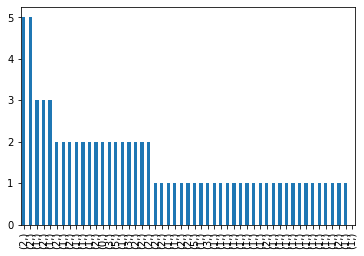

In [33]:
pd.Series([5, 5, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0], index=[market_list]).plot.bar()

From the results, the best neighborhoods are Monroeville and West Mifflin (4 grocery stores each), followed by Marshall Township, Bloomfield, and East Liberty (3 grocery stores each).

Limitations of this dataset include the faulty data, which caused me to manually analyze and tally the amount of supermarkets in each neighborhood. Similarily, the dataset was faulty including addresses for places like "Pizza Hut" and private residences that are not grocery stores. These faulty data needed sorting out.